In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

Question A.

<ipython-input-38-7a0d250d9d3b>:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fs_pct = pd.DataFrame(fs_pct1.append(fs_pct2, ignore_index=True))
<ipython-input-38-7a0d250d9d3b>:28: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fs_win = pd.DataFrame(fs_win1.append(fs_win2, ignore_index=True))
<ipython-input-38-7a0d250d9d3b>:31: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total_win = pd.DataFrame(fp_win.append(sp_win, ignore_index=True))
<ipython-input-38-7a0d250d9d3b>:45: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(fs_pct[:, np.newaxis], fs_win)


Text(0.5, 1.0, 'Relation between number of first serve and the number of wins due to it')

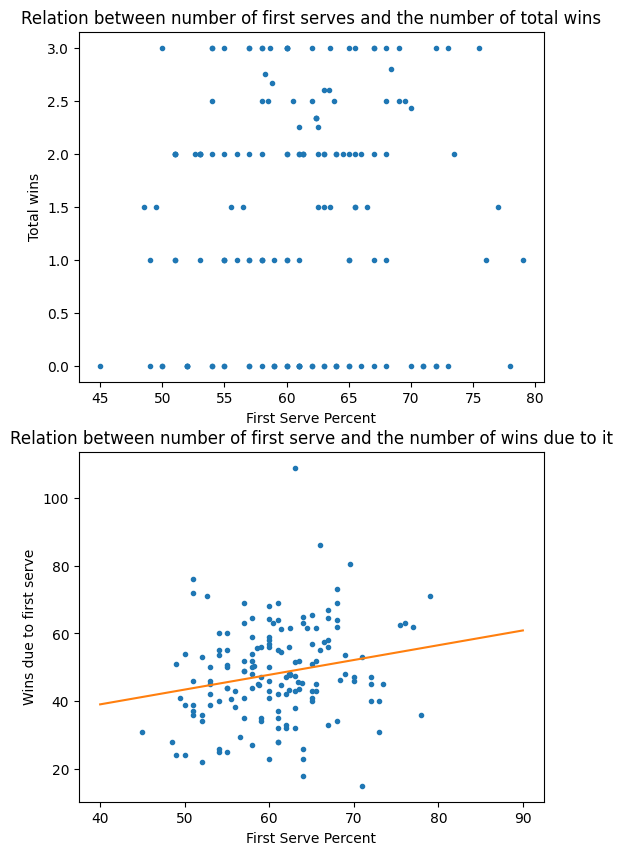

In [38]:
aus_men = pd.read_csv("AusOpen-men-2013.csv")
unique1 = aus_men.Player1.value_counts()
unique2 = aus_men.Player2.value_counts()

#print(unique1)
idc1 = unique1.index
idc2 = unique2.index

fs_pct1 = pd.Series(np.zeros(len(idc1)), index=idc1)
fs_win1 = pd.Series(np.zeros(len(idc1)), index=idc1)
fp_win = pd.Series(np.zeros(len(idc1)), index=idc1)
fs_pct2 = pd.Series(np.zeros(len(idc2)), index=idc2)
fs_win2 = pd.Series(np.zeros(len(idc2)), index=idc2)
sp_win = pd.Series(np.zeros(len(idc2)), index=idc2)

for player in idc1:
  fs_pct1[player] = aus_men[aus_men['Player1']==player]['FSP.1'].mean()
  fs_win1[player] = aus_men[aus_men['Player1']==player]['FSW.1'].mean()
  fp_win[player] = aus_men[aus_men['Player1']==player]['FNL1'].mean()
for player in idc2:
  fs_pct2[player] = aus_men[aus_men['Player2']==player]['FSP.2'].mean()
  fs_win2[player] = aus_men[aus_men['Player2']==player]['FSW.2'].mean()
  sp_win[player] = aus_men[aus_men['Player2']==player]['FNL2'].mean()

df_fs_pct = pd.DataFrame(fs_pct1.append(fs_pct2, ignore_index=True))
fs_pct = df_fs_pct.iloc[:,0]
#print(fs_pct)
df_fs_win = pd.DataFrame(fs_win1.append(fs_win2, ignore_index=True))
fs_win = df_fs_win.iloc[:,0]
#print(fs_win)
df_total_win = pd.DataFrame(fp_win.append(sp_win, ignore_index=True))
total_win = df_total_win.iloc[:,0]

model = LinearRegression()
xfit = np.linspace(40, 90, 1000)
plt.figure(figsize=(6, 10))
plt.subplot(211)
plt.plot(fs_pct, total_win, ".")
plt.xlabel("First Serve Percent")
plt.ylabel("Total wins")
plt.title("Relation between number of first serves and the number of total wins")

plt.subplot(212)
plt.plot(fs_pct, fs_win, ".")
model.fit(fs_pct[:, np.newaxis], fs_win)
yfit2 = model.predict(xfit[:, np.newaxis])
plt.plot(xfit, yfit2)
plt.xlabel("First Serve Percent")
plt.ylabel( "Wins due to first serve")
plt.title("Relation between number of first serve and the number of wins due to it")

Question B.

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
<ipython-input-19-d519f25e56bd>:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_error = pd.DataFrame(fp_error.append(sp_error, ignore_index=True))
<ipython-input-19-d519f25e56bd>:27: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_points = pd.DataFrame(fp_points.append(sp_points, ignore_index=True))
<ipython-input-19-d519f25e56bd>:29: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = pd.DataFram

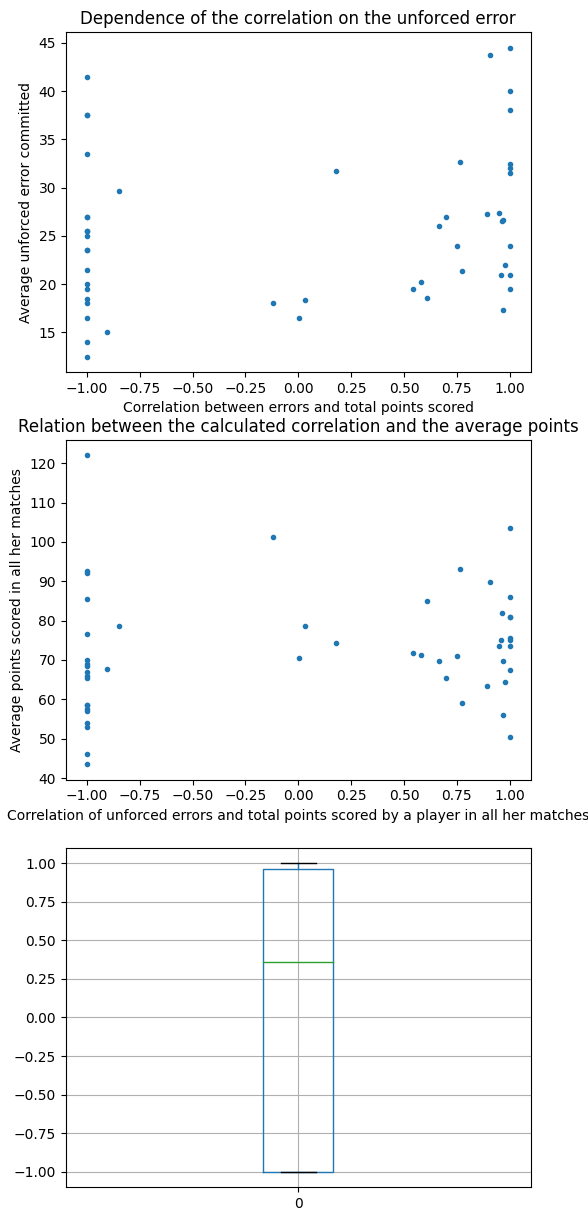

In [ ]:
aus_women = pd.read_csv("AusOpen-women-2013.csv")
unique1 = aus_women.Player1.value_counts()
unique2 = aus_women.Player2.value_counts()

idc1 = unique1.index
idc2 = unique2.index

fp_error = pd.Series(np.zeros(len(idc1)), index=idc1)
fp_points = pd.Series(np.zeros(len(idc1)), index=idc1)
fp_correlation = pd.Series(np.zeros(len(idc1)), index=idc1)
sp_error = pd.Series(np.zeros(len(idc2)), index=idc2)
sp_points = pd.Series(np.zeros(len(idc2)), index=idc2)
sp_correlation = pd.Series(np.zeros(len(idc2)), index=idc2)

for player in idc1:
  fp_error[player] = aus_women[aus_women['Player1'] == player]['UFE.1'].mean()
  fp_points[player] = aus_women[aus_women['Player1'] == player]['TPW.1'].mean()
  fp_correlation[player] = pd.Series(aus_women[aus_women['Player1'] == player]['UFE.1']).corr(pd.Series(aus_women[aus_women['Player1'] == player]['TPW.1']))

for player in idc2:
  sp_error[player] = aus_women[aus_women['Player2'] == player]['UFE.2'].mean()
  sp_points[player] = aus_women[aus_women['Player2'] == player]['TPW.2'].mean()
  sp_correlation[player] = pd.Series(aus_women[aus_women['Player2'] == player]['UFE.2']).corr(pd.Series(aus_women[aus_women['Player2'] == player]['TPW.2']))

df_error = pd.DataFrame(fp_error.append(sp_error, ignore_index=True))
error = df_error.iloc[:,0]
df_points = pd.DataFrame(fp_points.append(sp_points, ignore_index=True))
points = df_points.iloc[:,0]
df_corr = pd.DataFrame(fp_correlation.append(sp_correlation, ignore_index=True))
correlation = df_corr.iloc[:,0]

plt.figure(figsize=(6, 15))
plt.subplot(311)
plt.plot(df_corr, df_error, '.')
plt.xlabel("Correlation between errors and total points scored")
plt.ylabel("Average unforced error committed")
plt.title("Dependence of the correlation on the unforced error")

plt.subplot(312)
plt.plot(correlation, points, '.')
plt.xlabel("Correlation of unforced errors and total points scored by a player in all her matches")
plt.ylabel("Average points scored in all her matches")
plt.title("Relation between the calculated correlation and the average points")

plt.subplot(313)
boxplot = df_corr.boxplot()

Question C.

<ipython-input-24-1a1cbc439902>:55: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tp_gt = pd.DataFrame(fp_tp_gt.append(sp_tp_gt, ignore_index=True))
<ipython-input-24-1a1cbc439902>:57: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ace_gt = pd.DataFrame(fp_ace_gt.append(sp_ace_gt, ignore_index=True))
<ipython-input-24-1a1cbc439902>:59: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_np_gt = pd.DataFrame(fp_np_gt.append(sp_np_gt, ignore_index=True))
<ipython-input-24-1a1cbc439902>:62: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tp_lt = pd.DataFrame(fp_tp_lt.append(sp_tp_lt, ignore_index=True))
<ipython-input-24-1a1cbc43990

Text(0.5, 1.0, 'Distribution of points for inexperienced players')

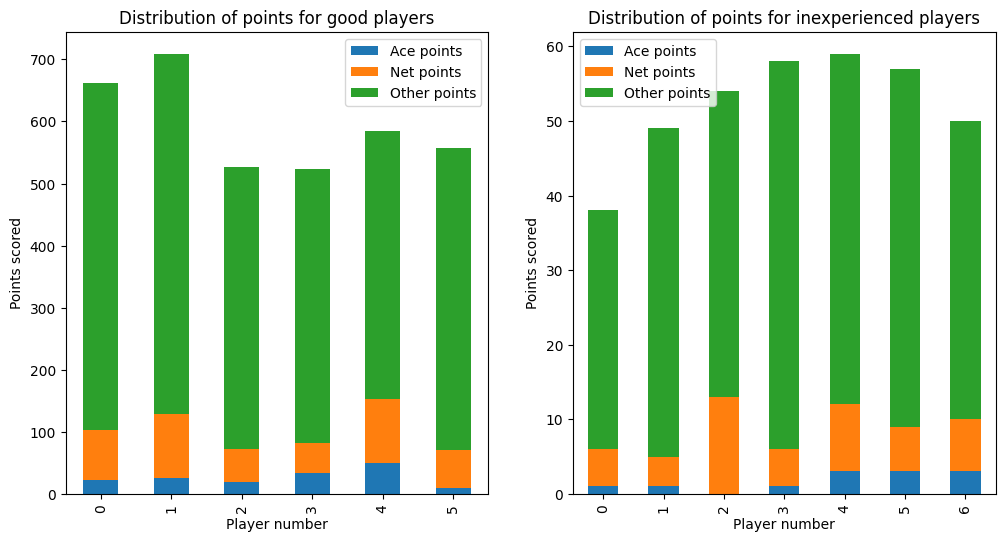

In [24]:
french_men = pd.read_csv("FrenchOpen-men-2013.csv")
unique1 = french_men.Player1.value_counts()
unique2 = french_men.Player2.value_counts()

idc1 = unique1.index
idc2 = unique2.index
fp_tp = pd.Series(np.zeros(len(idc1)), index=idc1)
sp_tp = pd.Series(np.zeros(len(idc2)), index=idc2)

for player in idc1:
  fp_tp[player] = french_men[french_men['Player1']==player]['TPW.1'].sum()

for player in idc2:
  sp_tp[player] = french_men[french_men['Player2']==player]['TPW.2'].sum()

fp_tp_gt = fp_tp[fp_tp.gt(500)]
sp_tp_gt = sp_tp[sp_tp.gt(500)]

fp_tp_lt = fp_tp[fp_tp.lt(50)]
sp_tp_lt = sp_tp[sp_tp.lt(60)]
#print(fp_tp_lt)
#print(sp_tp_lt)
indcs_gt_1 = fp_tp_gt.index
indcs_gt_2 = sp_tp_gt.index

indcs_lt_1 = fp_tp_lt.index
indcs_lt_2 = sp_tp_lt.index

fp_ace_gt = pd.Series(np.zeros(len(indcs_gt_1)), index=indcs_gt_1)
fp_np_gt = pd.Series(np.zeros(len(indcs_gt_1)), index=indcs_gt_1)
sp_ace_gt = pd.Series(np.zeros(len(indcs_gt_2)), index=indcs_gt_2)
sp_np_gt = pd.Series(np.zeros(len(indcs_gt_2)), index=indcs_gt_2)

fp_ace_lt = pd.Series(np.zeros(len(indcs_lt_1)), index=indcs_lt_1)
fp_np_lt = pd.Series(np.zeros(len(indcs_lt_1)), index=indcs_lt_1)
sp_ace_lt = pd.Series(np.zeros(len(indcs_lt_2)), index=indcs_lt_2)
sp_np_lt = pd.Series(np.zeros(len(indcs_lt_2)), index=indcs_lt_2)

for player in indcs_gt_1:
  fp_ace_gt[player] = french_men[french_men['Player1']==player]['ACE.1'].sum()
  fp_np_gt[player] = french_men[french_men['Player1']==player]['NPW.1'].sum()

for player in indcs_gt_2:
  sp_ace_gt[player] = french_men[french_men['Player2']==player]['ACE.2'].sum()
  sp_np_gt[player] = french_men[french_men['Player2']==player]['NPW.2'].sum()

for player in indcs_lt_1:
  fp_ace_lt[player] = french_men[french_men['Player1']==player]['ACE.1'].sum()
  fp_np_lt[player] = french_men[french_men['Player1']==player]['NPW.1'].sum()

for player in indcs_lt_2:
  sp_ace_lt[player] = french_men[french_men['Player2']==player]['ACE.2'].sum()
  sp_np_lt[player] = french_men[french_men['Player2']==player]['NPW.2'].sum()

df_tp_gt = pd.DataFrame(fp_tp_gt.append(sp_tp_gt, ignore_index=True))
tp_gt = df_tp_gt.iloc[:,0]
df_ace_gt = pd.DataFrame(fp_ace_gt.append(sp_ace_gt, ignore_index=True))
ace_gt = df_ace_gt.iloc[:,0]
df_np_gt = pd.DataFrame(fp_np_gt.append(sp_np_gt, ignore_index=True))
netp_gt = df_np_gt.iloc[:,0]

df_tp_lt = pd.DataFrame(fp_tp_lt.append(sp_tp_lt, ignore_index=True))
tp_lt = df_tp_lt.iloc[:,0]
df_ace_lt = pd.DataFrame(fp_ace_lt.append(sp_ace_lt, ignore_index=True))
ace_lt = df_ace_lt.iloc[:,0]
df_np_lt = pd.DataFrame(fp_np_lt.append(sp_np_lt, ignore_index=True))
netp_lt = df_np_lt.iloc[:,0]
#print(tp_lt)
column_names = ["Ace points", "Net points", "Other points"]
left_gt = tp_gt-(ace_gt+netp_gt)
left_lt = tp_lt-(ace_lt+netp_lt)
points_gt = pd.concat([ace_gt, netp_gt, left_gt], axis=1)
points_gt.columns = column_names
points_lt = pd.concat([ace_lt, netp_lt, left_lt], axis=1)
points_lt.columns = column_names

fig = plt.figure(figsize=(12, 6))
ax_gt = fig.add_subplot(121)
points_gt.plot.bar(stacked=True, ax=ax_gt)
ax_gt.set_xlabel("Player number")
ax_gt.set_ylabel("Points scored")
ax_gt.set_title("Distribution of points for good players")
ax_lt = fig.add_subplot(122)
points_lt.plot.bar(stacked=True, ax=ax_lt)
ax_lt.set_xlabel("Player number")
ax_lt.set_ylabel("Points scored")
ax_lt.set_title("Distribution of points for inexperienced players")


Question D.

<ipython-input-6-9f26bb2c8d7d>:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tp = pd.DataFrame(fp_tp.append(sp_tp, ignore_index=True))
<ipython-input-6-9f26bb2c8d7d>:21: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_dbf = pd.DataFrame(fp_dbf.append(sp_dbf, ignore_index=True))


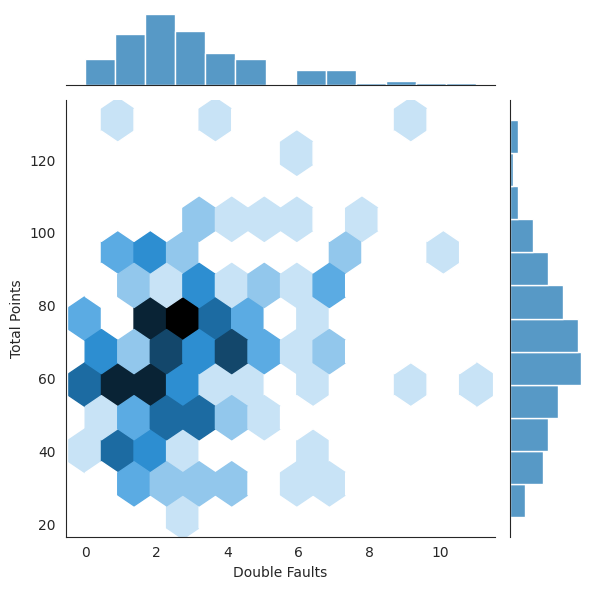

In [ ]:
french_women = pd.read_csv("FrenchOpen-women-2013.csv")
unique1 = french_women.Player1.value_counts()
unique2 = french_women.Player2.value_counts()

idc1 = unique1.index
idc2 = unique2.index
fp_tp = pd.Series(np.zeros(len(idc1)), index=idc1)
fp_dbf = pd.Series(np.zeros(len(idc1)), index=idc1)
sp_tp = pd.Series(np.zeros(len(idc2)), index=idc2)
sp_dbf = pd.Series(np.zeros(len(idc2)), index=idc2)

for player in idc1:
  fp_tp[player] = french_women[french_women['Player1']==player]['TPW.1'].mean()
  fp_dbf[player] = french_women[french_women['Player1']==player]['DBF.1'].mean()
for player in idc2:
  sp_tp[player] = french_women[french_women['Player2']==player]['TPW.2'].mean()
  sp_dbf[player] = french_women[french_women['Player2']==player]['DBF.2'].mean()

df_tp = pd.DataFrame(fp_tp.append(sp_tp, ignore_index=True))
tp = df_tp.iloc[:,0]
df_dbf = pd.DataFrame(fp_dbf.append(sp_dbf, ignore_index=True))
dbf = df_dbf.iloc[:,0]

column_names = ["Double Faults", "Total Points"]
faults = pd.concat([dbf, tp], axis=1)
faults.columns = column_names

with sns.axes_style('white'):
  sns.jointplot(x="Double Faults", y="Total Points", data=faults, kind='hex')
  #shows joint distribution along with assosciated marginal distributions
#sns.jointplot(x="Double Faults", y="Total Points", data=faults, kind='reg')

Question E.


0.7222222222222222


'plt.subplot(212)\nplt.scatter(bpw2, ynew, alpha=0.2)\nplt.plot(bpw2, res2, "r.")\nplt.xlabel("Breakpoints won by the player")\nplt.ylabel("Result of the match")\nplt.title("Players in the testing set and the predictions made")'

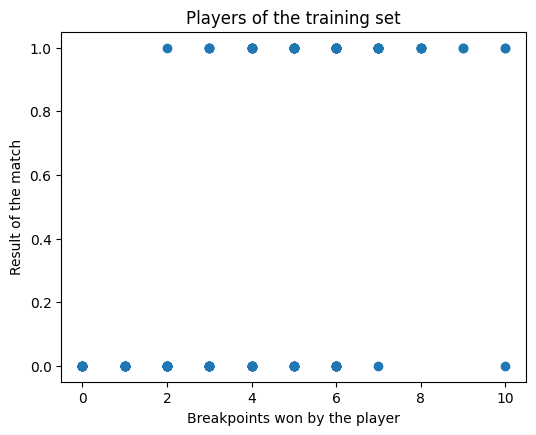

In [5]:
us_men = pd.read_csv("USOpen-men-2013.csv")

bpw1 = us_men['BPW.1'].to_numpy()
result = us_men['Result'].to_numpy()
bpw2 = us_men['BPW.2'].to_numpy()
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(bpw1[:, np.newaxis], result)
ynew = model.predict(bpw2[:, np.newaxis])
res2 = []
for ele in result:
  if ele==0:
    res2.append(1)
  else:
    res2.append(0)
#plt.scatter(bpw1)
from sklearn.metrics import accuracy_score
print(accuracy_score(res2, ynew))
plt.figure(figsize=(6, 10))
plt.subplot(211)
plt.scatter(bpw1, result)
plt.xlabel("Breakpoints won by the player")
plt.ylabel("Result of the match")
plt.title("Players of the training set")
"""plt.subplot(212)
plt.scatter(bpw2, ynew, alpha=0.2)
plt.plot(bpw2, res2, "r.")
plt.xlabel("Breakpoints won by the player")
plt.ylabel("Result of the match")
plt.title("Players in the testing set and the predictions made")"""

Text(0.5, 1.0, 'Players in the testing set and the predictions made')

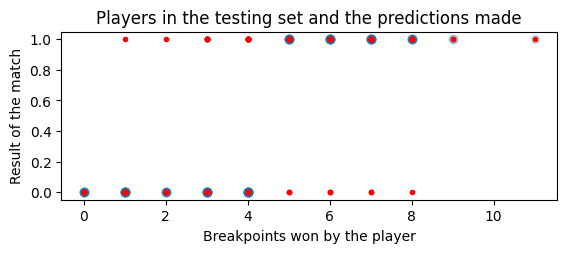

In [7]:
plt.subplot(212)
plt.scatter(bpw2, ynew, alpha=0.2)
plt.plot(bpw2, res2, "r.")
plt.xlabel("Breakpoints won by the player")
plt.ylabel("Result of the match")
plt.title("Players in the testing set and the predictions made")

Question F.

Text(0.5, 1.0, 'Relation between the percentage of second serves, the wins due to it and the final result')

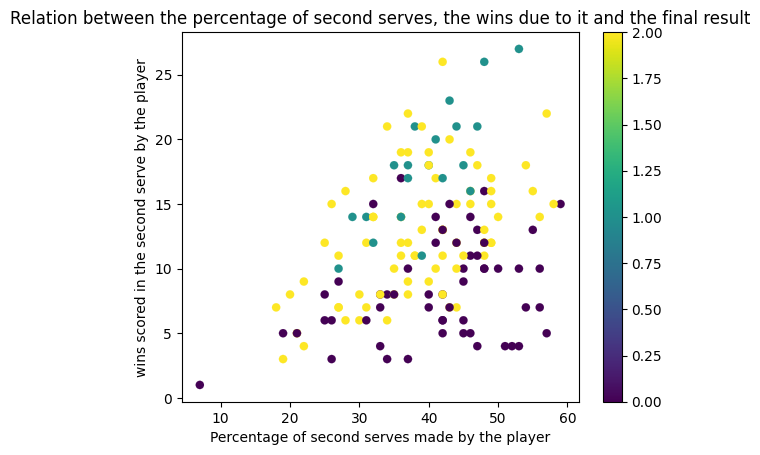

In [ ]:
us_women = pd.read_csv("USOpen-women-2013.csv")
plt.scatter(us_women['SSP.1'], us_women['SSW.1'], lw=0.1, c=us_women['FNL.1'])
plt.scatter(us_women['SSP.2'], us_women['SSW.2'], lw=0.1, c=us_women['FNL.2'])
plt.colorbar()
plt.xlabel("Percentage of second serves made by the player")
plt.ylabel("wins scored in the second serve by the player")
plt.title("Relation between the percentage of second serves, the wins due to it and the final result")

Question G.

[0.82608696 0.86956522 0.7826087  0.7826087  0.63636364]
0.7794466403162055


Text(0.5, 1.0, 'Relation between the winners earned by both the players and the result of the match')

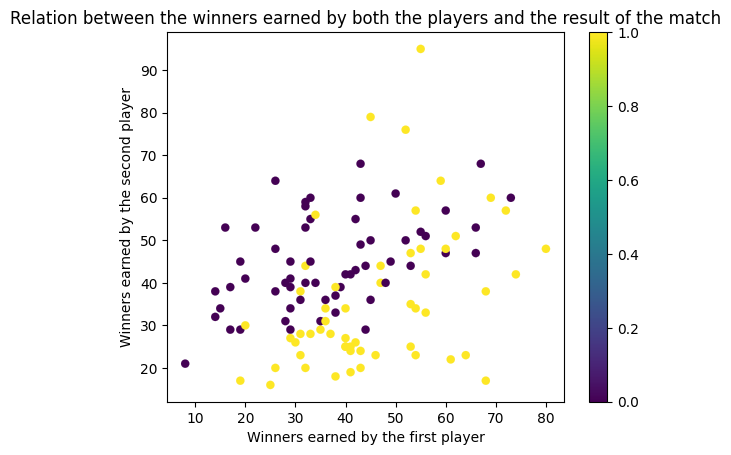

In [ ]:
wim_men = pd.read_csv("Wimbledon-men-2013.csv")

win1 = wim_men['WNR.1'].to_numpy()
win2 = wim_men['WNR.2'].to_numpy()
result = wim_men['Result'].to_numpy()

win = np.column_stack((win1, win2))
from sklearn.model_selection import cross_val_score
model = GaussianNB()
print(cross_val_score(model, win, result, cv=5))
print(cross_val_score(model, win, result, cv=5).mean())

plt.scatter(win1, win2, lw=0.1, c=result)
plt.colorbar()
plt.xlabel("Winners earned by the first player")
plt.ylabel("Winners earned by the second player")
plt.title("Relation between the winners earned by both the players and the result of the match")
#model.fit(win, result)

Question H. 

(118, 13)


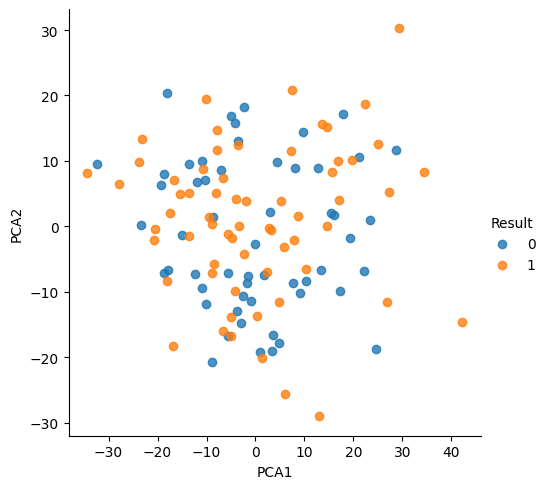

In [34]:
wim_women = pd.read_csv("Wimbledon-women-2013.csv")
# wim_women = wim_women.dropna(axis=0)

#display(wim_women)
df = wim_women[['Result', 'FNL.1', 'FNL.2', 'FSP.1', 'FSW.1', 'SSP.1', 'SSW.1', 'ACE.1', 'FSP.2', 'FSW.2', 'SSP.2', 'SSW.2', 'ACE.2']].dropna(axis=0)
mat = df.to_numpy()

#mat = np.column_stack((final1, final2, fs_pct1, fs_pct2, fs_win1, fs_win2, ss_pct1, ss_pct2, ss_win1, ss_win2, ace_1, ace_2))
print(mat.shape)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(mat)
X = pca.transform(mat)
df['PCA1'] = X[:, 0]
df['PCA2'] = X[:, 1]

sns.lmplot(x="PCA1", y="PCA2", hue='Result', data=df, fit_reg=False)